
## Test for Reading CSV files
### PH 212 COCC
#### Bruce Emerson 5/4/21

As we have been working with the Arduino to create a data logger which records data on a microSD card. Assuming we format the file appropriately as a csv file the pandas library is delighted to read the data into what's called a data frame. 

This quick notebook is an introduction that process.


### Dependencies

The new dependency here is the [Pandas](https://pandas.pydata.org/) library which was developed to support data science applications in python. It is classically imported with the alias pd. It is installed as part of your Anaconda package. When you update Anaconda you can also update Pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

### Read csv from Pandas

As we get deeper into python we will need to begin to develop a richer understanding of how python works. We can do this incrementally so don't panic. In Pandas there are a variety of [data structures](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) which are described in the pandas documentation. There is clearly a lot to learn be we will focus on [data frames](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) which are a data structure that matches our normal understanding of a two dimensional data set.

I am saddened that the national [COVID Tracking Project](https://covidtracking.com) has suspended operations as of 3/7/21. I hope this is because there are other public sources of data. 

## Where is the data file!!

The data files we are creating on our SD card are .csv files in the sense that they are text files with individual entries on each line separated by commas (comma separated values - csv). That is what the pd.read_csv() command is expecting. You will need to have your data file saved someplace where you can direct your python code to look. In the following command the 'data/anothercool2.csv' tells python to look in the local directory (where the notebook is located) for a folder called 'data' and then look for a file in that folder called 'anothercool2.csv'. 'data/anothercool2.csv' is called the path to the file. 

```
dataBruce = pd.read_csv('data/anothercool2.csv',sep='\t')
```
To use this notebook you will need to download the two data files in the cell below and save them on your computer in the appropriate place. This is one reason I have been encouraging you to be organized and structured in how you create and explore the python notebooks on your own computer. 

One data set I took temperature data every 5 s and the other I took data every 60 s with my data logger. You can see the difference in the data when you look at the plots.

### Separators:

Different programs use different characters for separating values on a single line of a .csv file. Historically the data elements are supposed to be separated with commas ',' but sometimes they are separated with a 'tab' or multiple spaces. My .csv files are separated with a 'tab' so I give the ```pd.read_csv('data/anothercool2.csv',sep='\t')``` an argument (```sep='\t'```) which tells the function to expect a 'tab' instead of a comma. Here is a [link to an article](https://www.symbiosisacademy.org/tutorial-index/pandas-read_csv-custom-separators/) describing some of the different possible separators and how you indicate them to pandas.

In [2]:
dataBruce = pd.read_csv('data/anothercool2.csv',sep='\t')
print(dataBruce)
dataSmooth = pd.read_csv('data/nextcool.csv',sep='\t')
print(dataSmooth)

     data  time(s)  temperature(C)
0       0     0.07           58.89
1       1     5.12           58.89
2       2    10.15           58.89
3       3    15.17           58.40
4       4    20.19           58.40
..    ...      ...             ...
295   295  1482.34           49.61
296   296  1487.36           50.59
297   297  1492.39           50.59
298   298  1497.41           50.59
299   299  1502.43           49.61

[300 rows x 3 columns]
    data  time(s)  temperature(C)
0      0     0.95           63.28
1      1    61.00           64.75
2      2   121.03           65.23
3      3   181.05           64.75
4      4   241.08           64.26
5      5   301.10           63.28
6      6   361.12           62.30
7      7   421.15           62.30
8      8   481.17           61.33
9      9   541.20           60.35
10    10   601.22           60.84
11    11   661.24           59.86
12    12   721.27           59.86
13    13   781.29           59.86
14    14   841.31           59.86
15    15   9

### Columns in the Data Frame:

In a standard csv file the first line of the file consists of the names at the top of a column of data. When Pandas reads the file it saves those column names as identifiers. When we want to pull out a specific column of data then we just name it exactly like a subscript to the dataframe object. In this case I read the data into a data frame caled dataBruce. The column names are an attribute of the data frame called dataBruce. In the following cell I pull out the column for 'time(s)' and 'temperature(C)' as two lists (dataTime and dataTemp) as my x and y values to plot. Then I just use the usual plotting tools to present the data.

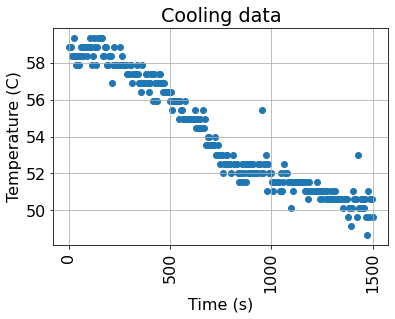

In [4]:
# code cell that creates the plot
dataTime = dataBruce['time(s)']
dataTemp = dataBruce['temperature(C)']
fig, ax = plt.subplots()
ax.scatter(dataTime, dataTemp)

plt.rcParams.update({'font.size': 16}) # make labels easier to read
plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Cooling data')
ax.grid()

fig.savefig("myplot.png")
plt.show()


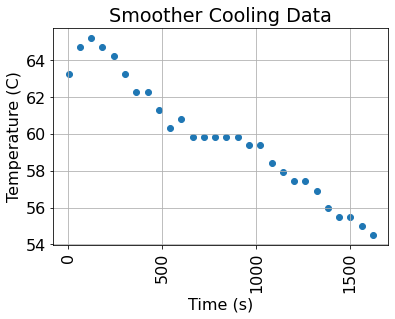

In [5]:
# code cell that creates the plot
dataTimeS = dataSmooth['time(s)']
dataTempS = dataSmooth['temperature(C)']
fig, ax = plt.subplots()
ax.scatter(dataTimeS, dataTempS)

plt.rcParams.update({'font.size': 16}) # make labels easier to read
plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Smoother Cooling Data')
ax.grid()

fig.savefig("myplot.png")
plt.show()

In [6]:
dataAgain = pd.read_csv('data/anothercool3.csv',sep='\t')
print(dataAgain)

    data  time(s)  temperature(C)
0      0     0.14           48.63
1      1    60.19           47.66
2      2   120.22           48.63
3      3   180.24           48.14
4      4   240.26           48.63
5      5   300.28           47.66
6      6   360.31           46.68
7      7   420.33           46.68
8      8   480.35           46.19
9      9   540.37           46.68
10    10   600.40           46.19
11    11   660.42           45.21
12    12   720.44           45.70
13    13   780.46           45.21
14    14   840.49           43.75
15    15   900.51           44.24
16    16   960.53           43.26
17    17  1020.55           45.21
18    18  1080.58           43.26
19    19  1140.60           42.77
20    20  1200.62           43.26
21    21  1260.65           41.80
22    22  1320.67           40.82
23    23  1380.69           41.80
24    24  1440.71           42.29
25    25  1500.73           42.77
26    26  1560.76           42.77
27    27  1620.78           41.31
28    28  1680

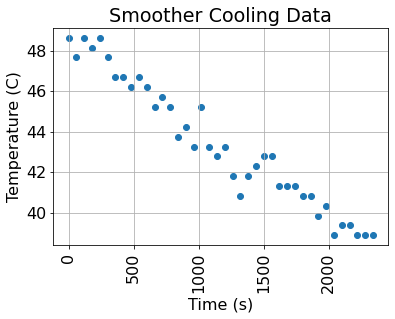

In [7]:
# code cell that creates the plot
dataTimeA = dataAgain['time(s)']
dataTempA = dataAgain['temperature(C)']
fig, ax = plt.subplots()
ax.scatter(dataTimeA, dataTempA)

plt.rcParams.update({'font.size': 16}) # make labels easier to read
plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Smoother Cooling Data')
ax.grid()

fig.savefig("myplot.png")
plt.show()

### DataFrame Attributes

DataFrame is a python class which is to say it is a creature that has various predefined characteristics called attributes. These are created to make pulling out discrete portions of the data set easier. What I would want you to understand is that these attributes exist and you can recognize them in the code when you see and object like out dataSet (which is a DataFrame) with a .something appended to it. 

Here is a stragtegy if you want to see everything. The dir() command asks python to look at the code in the library that is associated with the class (in this case a DataFrame) and just list all the files in that library. This is definitely overkill but will give you a sense of what's out there. The ones we are most interested in are at the end of the list and are of the from 'name'. 

Once you know about a particular attribute if you search for that attribute you may find a useful guide on the web. Here is the [documentation for the attributes of the DataFrame class](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)


In [8]:
dir(pd.DataFrame)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmo

### Using Attributes

Here are some examples:

dataSet.index -- tells up how many lines are in the object (notice header + 146 lines = 0 to 147)   
dataSet.columns -- gives me the names of the columns from the header row.  
dataSet.dtypes -- tells me what sort of data is in each column.  

### Conclusion

I think that's enough for now. What we need to do now is generate some of our own data and import the csv data file to plot.